In [1]:
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
import json
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from pyslabgrid import mat as mat


In [2]:
subdmod =  mat.getdict('../data/subduction_model/subduction_model.mat')
f = open("nzborders/nzborders.json")
border = json.load(f)
f.close()

In [3]:
#pip install --upgrade matplotlib

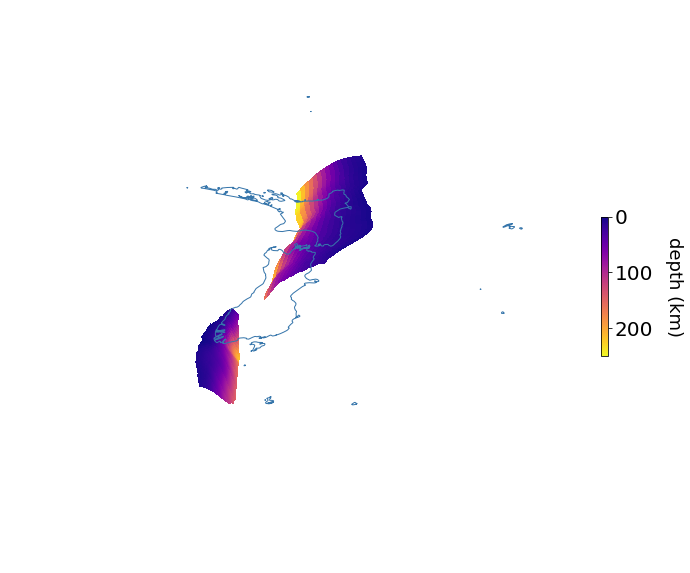

In [11]:
import warnings; warnings.simplefilter('ignore')

%matplotlib inline
X = subdmod['hik']['lon_interface']
Y = subdmod['hik']['lat_interface']
D = subdmod['hik']['dep_interface']
Z = np.array([[ float("nan") if np.isnan(zz) else zz for zz in z] for z in D])


fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111,projection='3d')
#ax = plt.axes(projection='3d')

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.plasma,
                       linewidth=0, antialiased=False, vmin=0, vmax=250)

X = subdmod['puy']['lon_interface']
Y = subdmod['puy']['lat_interface']
D = subdmod['puy']['dep_interface']
Z = np.array([[ float("nan") if np.isnan(zz) else zz for zz in z] for z in D])

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.plasma,
                       linewidth=0, antialiased=False, vmin=0, vmax=250)

ax.plot3D(border['lon'], border['lat'], [0]*len(border['lon']),'-',\
             linewidth= 1, color='#3776AB', zorder=4);

cbar = fig.colorbar(surf, shrink=0.2)
cbar.ax.get_yaxis().labelpad = 30
cbar.ax.set_ylabel('depth (km)', rotation=270, fontsize=18)
cbar.ax.tick_params(labelsize=20)
cbar.ax.invert_yaxis() 

# ax.text(170, -41, 0, 'Australian Plate', fontsize=18, rotation= 90, zdir=(1,1,0))
# ax.text(169, -49, 0, 'Pacific Plate', fontsize=18, rotation= 90, zdir=(1,1,0))

# ax.text(175, -40, 0, 'Hikurangi', \
#         fontsize=18, zdir=(1,1,0), color='c')

# # ax.text(165.5, -47, 0, 'Puysegur', \
# #         fontsize=18, zdir=(1,1,0),  color='c', zorder=100)
# ax.text(165, -47.5, 0, 'Puysegur', \
#         fontsize=18, zdir=(1,1,0),  color='c', zorder=100)


ax.set_box_aspect((1, 1, 0.1))
ax.set_zlim(0, 250)
ax.invert_zaxis()
#ax.view_init(elev=90., azim=-99)
ax.view_init(elev=30., azim=-120)
#plt.subplots_adjust(left=0.6, right=0.7, top=0.7, bottom=0.3)
plt.xlim([164,182])
plt.ylim([-50, -34]);
ax.set_axis_off()
fig.tight_layout()
plt.savefig('subduction3d.png', dpi=300, transparent=True)